#8

##importing the required libraries

In [1]:
from matplotlib import pyplot
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from keras.datasets import cifar10
import sys
import numpy as np
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.optimizers import SGD
from keras.optimizers import adam
from keras.optimizers import rmsprop

## load dataset

In [2]:
(trainX, trainy), (testX, testy) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


##show some examle of dataset

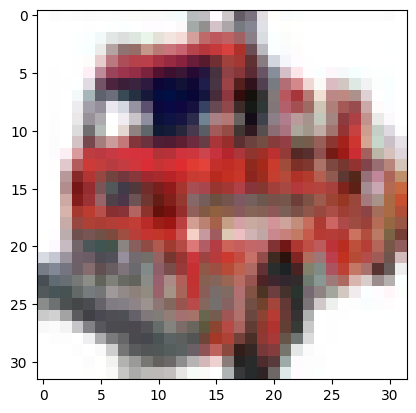

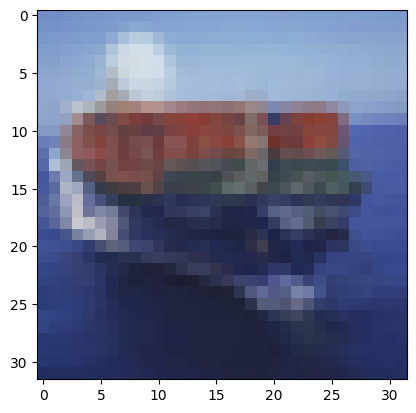

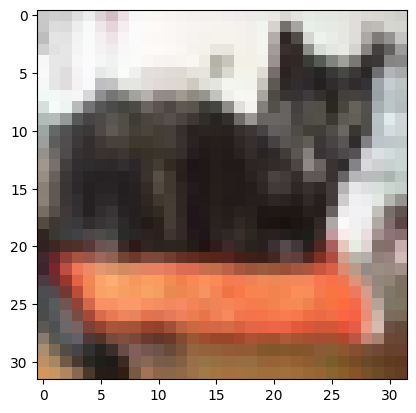

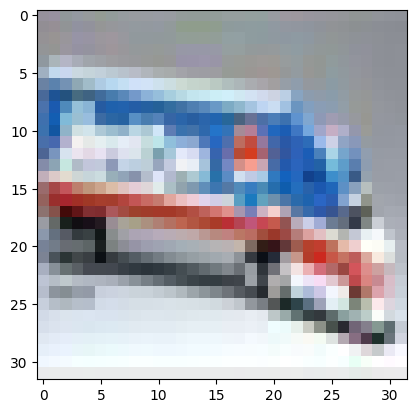

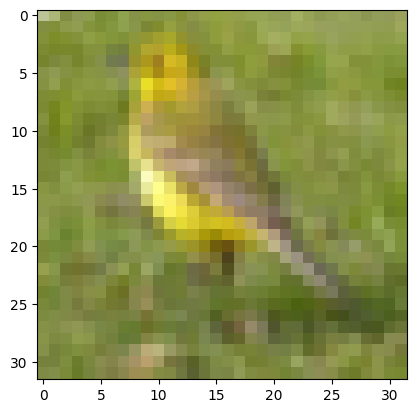

In [4]:
pyplot.imshow(testX[9854])
pyplot.show()
pyplot.imshow(testX[4300])
pyplot.show()
pyplot.imshow(testX[2815])
pyplot.show()
pyplot.imshow(testX[7685])
pyplot.show()
pyplot.imshow(testX[4534])
pyplot.show()

## one hot encode target values

In [5]:
from keras.utils import to_categorical
trainY = to_categorical(trainy)
testY = to_categorical(testy)

## convert from integers to floats  ad normalize

In [6]:
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')

trainX = train_norm / 255.0
testX = test_norm / 255.0

##split train and val

In [7]:
 trainX, x_val, trainY, y_val = train_test_split(trainX, trainY, test_size=0.2, random_state=42)

##define cnn model

In [8]:
def define_model(opt):
 model = Sequential()
 model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
 model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
 model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
 model.add(MaxPooling2D((2, 2)))
 model.add(Dropout(0.2))
 model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
 model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
 model.add(MaxPooling2D((2, 2)))
 model.add(Dropout(0.2))
 model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
 model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
 model.add(MaxPooling2D((2, 2)))
 model.add(Dropout(0.2))
 model.add(Flatten())
 model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
 model.add(Dropout(0.2))
 model.add(Dense(10, activation='softmax'))

 model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
 return model

In [9]:

# plot diagnostic learning curves
def summarize_diagnostics(history):

	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')

	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.show()



##recall & confu ........

In [10]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
def caculator(y_pred,y_test):
  accuracy = accuracy_score(y_test, y_pred)
  print('Accuracy: %f' % accuracy)
  # precision tp / (tp + fp)
  precision = precision_score(y_test, y_pred,average='macro')
  print('Precision: %f' % precision)
  # recall: tp / (tp + fn)
  recall = recall_score(y_test, y_pred,average='macro')
  print('Recall: %f' % recall)
  # f1: 2 tp / (2 tp + fp + fn)
  f1 = f1_score(y_test, y_pred,average='macro')
  print('F1 score: %f' % f1)
  print('confusion_matrix : ' % f1)
  print(confusion_matrix( y_test,y_pred))

[0.5906564593315125, 0.8001000285148621]
Accuracy: 0.800100
Precision: 0.800586
Recall: 0.800100
F1 score: 0.797951
confusion_matrix : 
[[847  16  19  17  11   3   9  16  37  25]
 [ 16 900   1   3   1   4   8   1  11  55]
 [ 65   3 627  42  91  63  66  35   4   4]
 [ 16   5  41 582  71 171  48  46   4  16]
 [ 14   1  22  24 811  23  24  74   5   2]
 [ 12   3  16 115  39 729  16  60   4   6]
 [  7   2  20  41  34  15 864   7   5   5]
 [  9   0  11  28  31  34   0 881   0   6]
 [ 70  19   6   5   5   4   5   6 860  20]
 [ 19  44   2   5   3   3   1   6  17 900]]


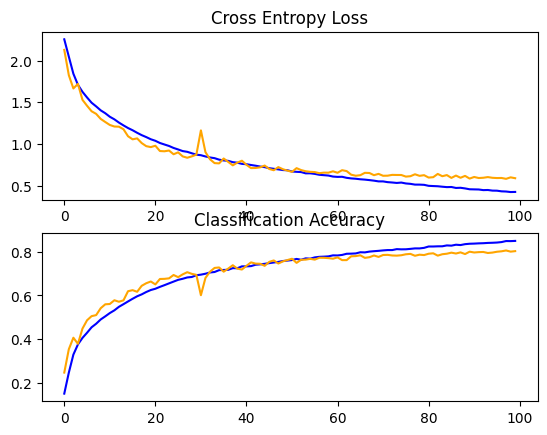

In [13]:
#adam SGD rmsprop
model = define_model("SGD")
history = model.fit(trainX, trainY, epochs=100, batch_size=128, validation_data=(x_val, y_val), verbose=0)
result = model.evaluate(testX, testY, verbose=0)
y_pred = model.predict(testX, verbose=0)
print(result)
caculator(np.argmax(y_pred, axis=1),np.argmax(testY, axis=1))
summarize_diagnostics(history)